In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
#Load the data
df = pd.read_csv('fhs_train.csv')

In [40]:
#Identifying missing values
print(df.isnull().sum())

Unnamed: 0           0
sex                  0
age                  0
education           85
currentSmoker        0
cigsPerDay          24
BPMeds              37
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             39
sysBP                0
diaBP                0
BMI                 15
heartRate            0
glucose            285
TenYearCHD           0
dtype: int64


In [41]:
# Impute missing values for variables with low missings using median (avoid outliers)
df['education'].fillna(df['education'].median(), inplace=True)
df['cigsPerDay'].fillna(df['cigsPerDay'].median(), inplace=True)
df['BPMeds'].fillna(df['BPMeds'].median(), inplace=True)
df['totChol'].fillna(df['totChol'].median(), inplace=True)
df['BMI'].fillna(df['BMI'].median(), inplace=True)

In [42]:
print(df.isnull().sum())

Unnamed: 0           0
sex                  0
age                  0
education            0
currentSmoker        0
cigsPerDay           0
BPMeds               0
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol              0
sysBP                0
diaBP                0
BMI                  0
heartRate            0
glucose            285
TenYearCHD           0
dtype: int64


In [43]:
#For glucose, which has a relatively high missing value count, we will use some linear regression to do predictive imputation.
from sklearn.linear_model import LinearRegression
# Separate data
complete_data = df[df['glucose'].notnull()]
missing_data = df[df['glucose'].isnull()]

# Define features and target for imputation
X_train = complete_data.drop(['glucose'], axis=1)
y_train = complete_data['glucose']
X_incomplete = missing_data.drop(['glucose'], axis=1)

# init. and train linear regression model for imputation
imputation_model = LinearRegression()
imputation_model.fit(X_train, y_train)

# missing values
imputed_values = imputation_model.predict(X_incomplete)

# Fill missing values in the original dataframe
df.loc[df['glucose'].isnull(), 'glucose'] = imputed_values

In [44]:
print(df.isnull().sum())

Unnamed: 0         0
sex                0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64


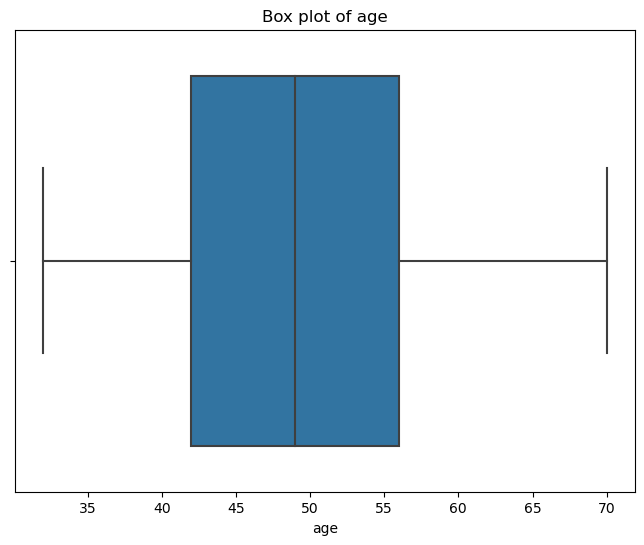

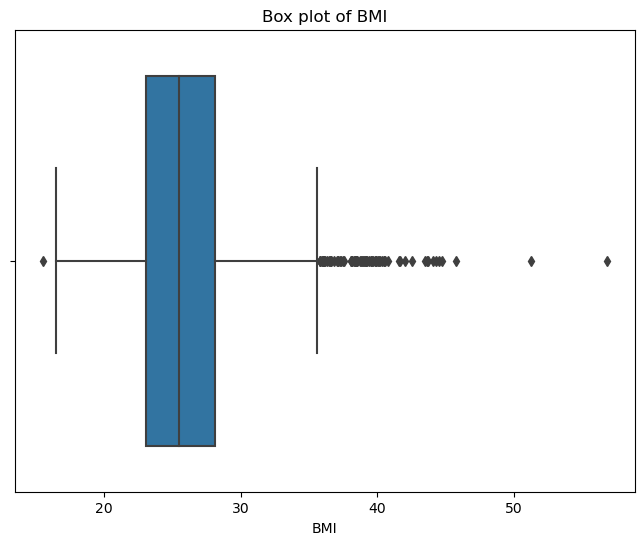

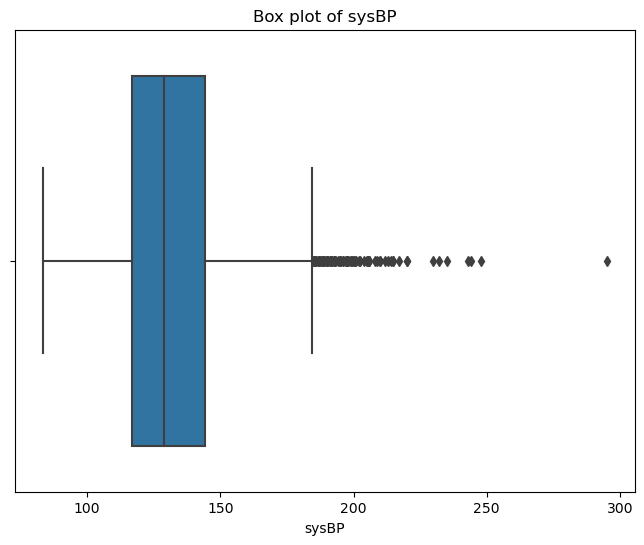

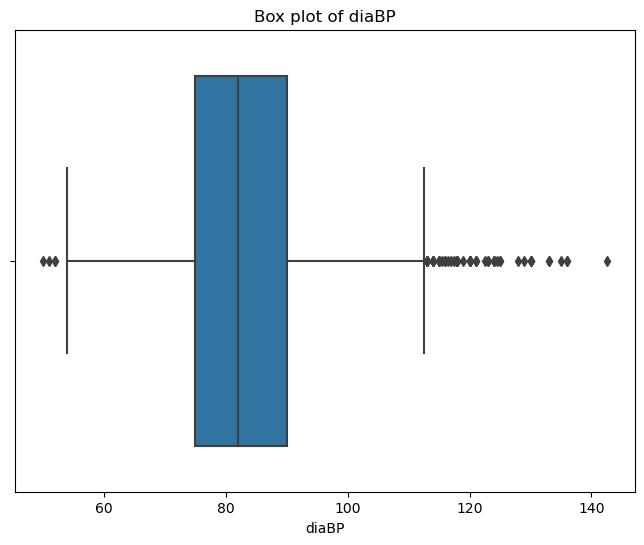

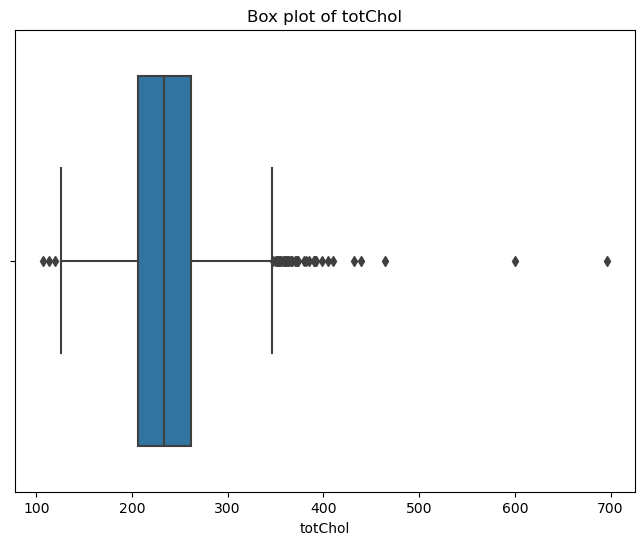

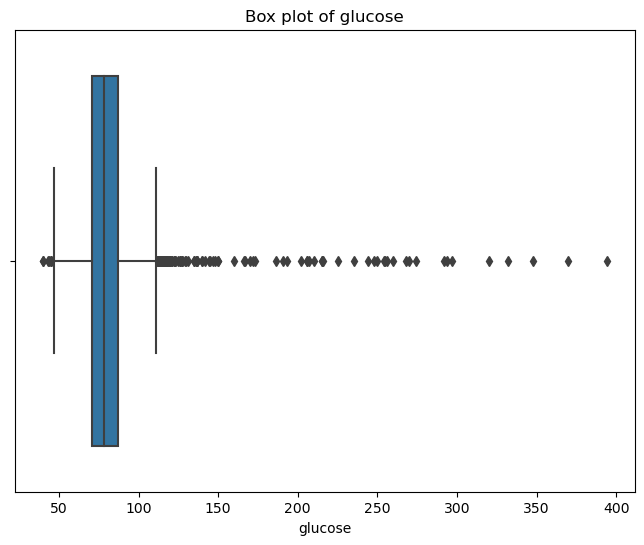

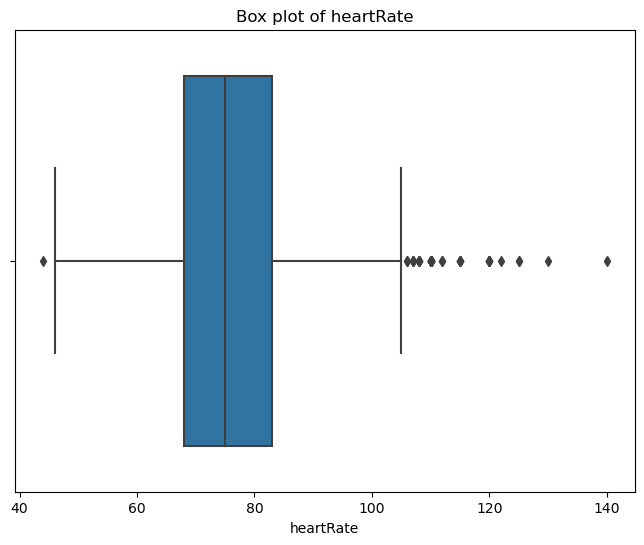

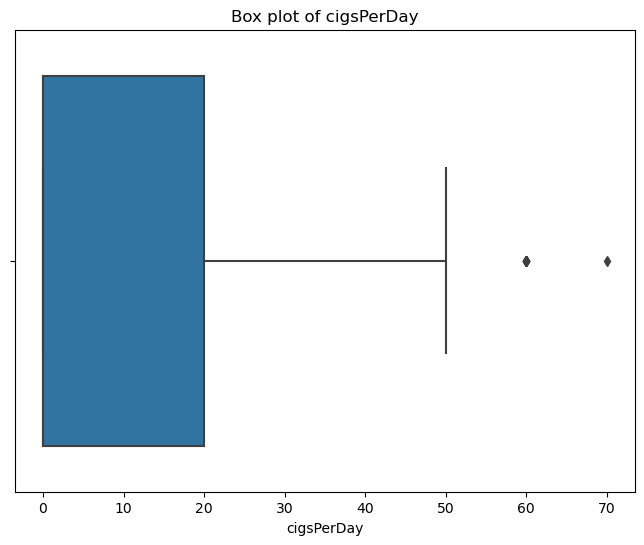

In [45]:
#Now that the data is free of missing values, we can look at outliers for variables that may contain some
key_var = ['age', 'BMI', 'sysBP', 'diaBP', 'totChol', 'glucose', 'heartRate', 'cigsPerDay']
for feature in key_var:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=data[feature])
    plt.title(f'Box plot of {feature}')
    plt.show()

In [46]:
#MAY RETURN TO REMOVING OUTLIERS TO IMPROVE PREDICTION
#Could use Winsorizing
"""
## Function to Windsorize a variable:
def winsorize(x):
    # Convert from pd to np, if necessary:
    if type(x) == 'pandas.core.series.Series':
        x = x.to_numpy()
    # Compute IQR and 25, 75 quantiles:
    pct25, pct75 = np.percentile(x,[25,75])
    iqr = pct75 - pct25
    # Compute whiskers:
    lower_whisker = pct25 - iqr*1.5
    upper_whisker = pct75 + iqr*1.5
    # Windorize x:
    x_winsor = np.copy(x)
    x_winsor[ x < lower_whisker ] = lower_whisker
    x_winsor[ x > upper_whisker ] = upper_whisker
    return(x_winsor)

sns.boxplot( winsorize(x))
"""

In [50]:
#Lets use one-hot encoding for categorical variable eduction. Will ensure regression can appropriately use this data. 
#generate a DataFrame with one-hot encoded columns for the "education" variable based on the existing numeric codes in the dataset. 
#Each education level will be represented by a separate binary column.

df_change = pd.DataFrame({'education': [1, 2, 4, 4]})

df = pd.get_dummies(data, columns=['education'], drop_first=False)
print(df)

      Unnamed: 0  sex  age  currentSmoker  cigsPerDay  BPMeds  \
0           1267    1   58              0         0.0     0.0   
1           1209    0   40              1        15.0     0.0   
2           2050    0   52              0         0.0     0.0   
3           1183    1   38              1        43.0     0.0   
4           3225    0   43              0         0.0     0.0   
...          ...  ...  ...            ...         ...     ...   
3175        1411    1   36              0         0.0     0.0   
3176         262    1   47              1        20.0     0.0   
3177        1459    1   52              0         0.0     0.0   
3178         733    0   48              1         5.0     0.0   
3179         691    0   60              1        15.0     0.0   

      prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
0                   0             0         0    220.0  143.0  104.0  29.85   
1                   0             0         0    199.0  122.0

In [48]:
#Begin Linear Regression with clean data